## Dominant Color Extraction for Image Segmentation
- **Image Segmentation**
- Segmentation partitions an image into regions having similar visual appearance corresponding to parts of objects
- We will try to extract the most dominant 'K' Colors using K-Means
- We can apply K-Means with each pixel will reassigned to the closest of the K Colors, leading to segmentation

<img src="example.png" alt="Pizza-1" style="width: 800px;"/>



Fig : Bishop, Pattern Recognition and ML

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [6]:
img = cv2.imread('elephant.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

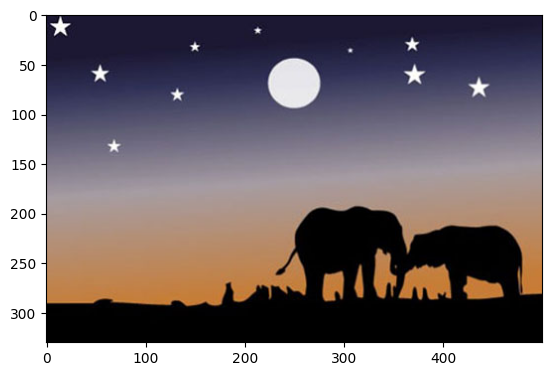

In [7]:
plt.imshow(img)
plt.show()

In [8]:
img.shape

(330, 500, 3)

In [10]:
# Flatten Each channel of the Image
all_pixels  = img.reshape((-1,3))
print(all_pixels.shape)

(165000, 3)


In [11]:
from sklearn.cluster import KMeans

In [38]:
dominant_colors = 4

km = KMeans(n_clusters=dominant_colors)
km.fit(all_pixels)


KMeans(n_clusters=4)

In [39]:
centers = km.cluster_centers_

In [40]:
centers

array([[187.46739478, 133.49515923,  87.35821731],
       [  1.76265632,   1.00643956,   1.32502515],
       [150.89691286, 139.57896657, 146.63625748],
       [ 49.25216719,  46.86443435,  75.74118744]])

In [41]:
centers = np.array(centers,dtype='uint8')

In [42]:
print(centers)

[[187 133  87]
 [  1   1   1]
 [150 139 146]
 [ 49  46  75]]


### Plot what all colors are these ?

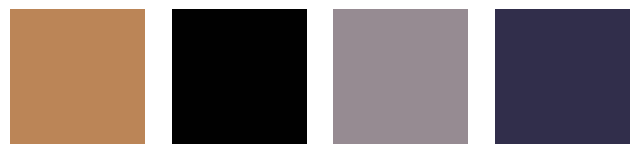

In [43]:
plt.figure(figsize=(centers.shape[0]*2,2))

i = 1

for center in centers:
    plt.subplot(1,centers.shape[0],i)
    i += 1
    na = np.zeros(shape=(100,100,3),dtype='uint8')
    na[:,:,:] = center
    plt.axis('off')
    plt.imshow(na)

plt.show()

## Segmenting Our Original Image

In [44]:
new_img = np.zeros((330*500,3),dtype='uint8')

print(new_img.shape)


(165000, 3)


In [45]:
centers

array([[187, 133,  87],
       [  1,   1,   1],
       [150, 139, 146],
       [ 49,  46,  75]], dtype=uint8)

In [46]:
km.labels_

array([3, 3, 3, ..., 1, 1, 1])

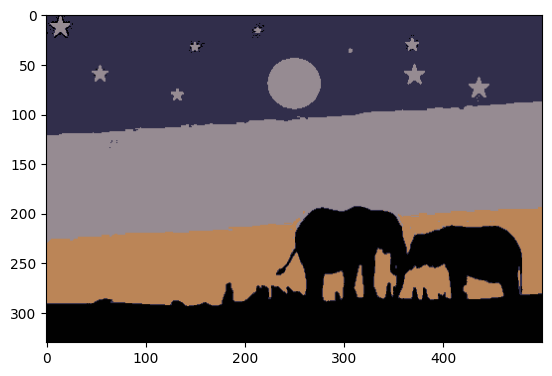

In [47]:

for ix in range(new_img.shape[0]):
    new_img[ix] = centers[km.labels_[ix]]
    
new_img = new_img.reshape((img.shape))
plt.imshow(new_img)
plt.show()
    
    
